# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 1: CNN - MNIST, Cats & Dogs

## Learning Objectives:

At the end of the experiment, you will be able to:

1. Understand Conv2D and MaxPooling layers used in ConVNet
2. Build a simple ConvNet for image classification using the digit MNIST dataset
3. Build another  ConvNet for  image Classification using the cats-and-dogs dataset
4. Apply Data Augmentation





## 1. Building a simple CNN


Let's start with a simple example. We will
1. Build a CNN with convolution and pooling layers
2. Train it on the MNIST dataset

The figure below is a typical ConvNet (LeNet) architecture that we are going to build but with different numbers and sizes of filters.

![picture](https://drive.google.com/uc?export=view&id=1vT8e59AYTFRlrrI3C-iUHTctxyhfBiJJ)

### Setup Steps:

In [11]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2303237" #@param {type:"string"}

In [12]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8894177107" #@param {type:"string"}

In [13]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_01_Convolutional_Neural_Networks_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Import libraries

In [5]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## Load data

In [6]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

## Reshape and convert to float

In [7]:
# Reshape and convert to float

train_images = train_images.reshape((60000, 28, 28, 1))                                 # Q: How many samples do we have? A: 60000
train_images = train_images.astype('float32')/255                                    # Q: Why are we dividing by 255? A: To rescale data to lie in [0,1]
print(f"train_images.shape = {train_images.shape}")
test_images = test_images.reshape((10000, 28, 28, 1))                                 # Q: How many samples do we have? A: 60000
test_images = test_images.astype('float32')/255


train_images.shape = (60000, 28, 28, 1)


### Building the architecture
LeNet-5: Example of an early ConvNet

In [8]:
# Define convnet
# Q: Which API are we using? A: Functional API
inputs = layers.Input(shape = (28, 28, 1))                                                       # Q: How many channels does the input image have? A: 1
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs)                                                     # Q: Meaning of each argument?
x = layers.MaxPooling2D(pool_size = 2)(x)                                                         # Q: What is the height and width of feature maps after this layer? A: 13x13
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = 'softmax')(x)                                                  # Need Dense layer at the end for classification
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
# Give model summary

model.summary()
# Q: Verify no. of params in 1st conv layer # A: (3X3X1 + 1) X 32 ; 32 filters, 9 weights per kernel, 1 bias ber kernel

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",     # Q: Why sparse_cat_crossent?  A: labels are not one-hot-encoded
              metrics=["accuracy"])

#### Call Back Function

In [11]:
# Define a function to return a commmonly used callback_list
def def_callbacks(filepath, mod_chk_mon = "val_loss", earlystop = 0 ):
    callback_list = []

    # Defualt callback
    callback_list.append(keras.callbacks.ModelCheckpoint(filepath, save_best_only = True, monitor = mod_chk_mon))
    if earlystop > 0:
        callback_list.append(keras.callbacks.EarlyStopping(monitor = mod_chk_mon, patience= earlystop))

    return callback_list

### Training & Evaluation

In [12]:
PARTIAL_RUN = False
epochs = 10
if PARTIAL_RUN:
  epochs = 2
# Fit the model
model.fit(train_images, train_labels, batch_size = 64, epochs = epochs, validation_split= 0.2, callbacks = def_callbacks("prob1"))

Epoch 1/10
750/750 [==============================] - 49s 64ms/step - loss: 0.1934 - accuracy: 0.9396 - val_loss: 0.0665 - val_accuracy: 0.9798
Epoch 2/10
750/750 [==============================] - 47s 63ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 3/10
750/750 [==============================] - 50s 67ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 4/10
750/750 [==============================] - 50s 66ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 5/10
750/750 [==============================] - 52s 69ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0380 - val_accuracy: 0.9897
Epoch 6/10
750/750 [==============================] - 50s 67ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 7/10
750/750 [==============================] - 49s 65ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0404 - val_accuracy:

### Prediction on test data

In [13]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)  # Q: Which state is this model at? A: Slightly overfit, trained till 10th epoch
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0311 - accuracy: 0.9928
Test accuracy: 0.993


1/1 [==============================] - 0s 117ms/step


array([[1.4928600e-17, 2.7669982e-17, 1.5450424e-20, 9.7110478e-07,
        2.3621769e-23, 9.9999905e-01, 1.8590136e-18, 1.1597210e-18,
        6.5846925e-11, 9.8715578e-13]], dtype=float32)

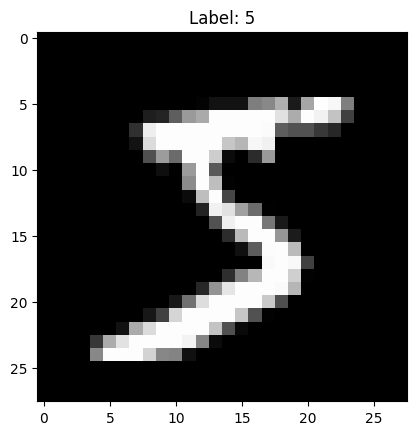

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show
model.predict(train_images[0].reshape(1,28,28,1))

Nearly **99%** accurate! This is much better than what we achieved with our feedforward network with only dense layers!

### Now, let's see the importance of pooling layers.

We will make a new model called 'model_no_max_pool' without any pooling layers and compare it with the previous model.

In [15]:
# Define a new convnet without any pooling layers
z = layers.Conv2D(filters= 32, kernel_size = 3, activation= 'relu')(inputs)
z = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(z)
z = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(z)
z = layers.Flatten()(z)
outputs_no_pool = layers.Dense(10, activation = 'softmax')(z)
model_no_max_pool = keras.Model(inputs= inputs, outputs= outputs_no_pool)
# Q: Do you expect more/less no. of trainable params? A: More number of params because of lager no. of neurons before the dense layer

In [16]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

In [17]:
model_no_max_pool.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_no_max_pool.fit(train_images, train_labels, batch_size = 64, epochs = epochs, validation_split= 0.2, callbacks = def_callbacks("prob1"))

Epoch 1/10
750/750 [==============================] - 393s 523ms/step - loss: 0.1389 - accuracy: 0.9578 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 2/10
750/750 [==============================] - 384s 512ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0552 - val_accuracy: 0.9847
Epoch 3/10
750/750 [==============================] - 372s 496ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 4/10
750/750 [==============================] - 356s 475ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 5/10
750/750 [==============================] - 355s 473ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 6/10
750/750 [==============================] - 373s 497ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0579 - val_accuracy: 0.9882
Epoch 7/10
750/750 [==============================] - 373s 497ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.0670 -

In [18]:
test_loss_m , test_accuracy_m = model_no_max_pool.evaluate(test_images, test_labels)

313/313 [==============================] - 22s 70ms/step - loss: 0.0735 - accuracy: 0.9879


#### Observations from models with and without pooling layers
1. The initial model with pooling layers had just 104,202 parameters but the model without pooling layers (model_no_max_pool) has 712,202 parameters i.e. increase in the number of trainable parameters. **Model with pooling layer is less prone to overfitting** due to a smaller number of parameters/weights.

2. What other advantage does the pooing layer provide? **They facilitate learning a spatial hierarchy of features**.

  In the CNN given below. Imagine a 1x1 patch on a C3 feature map. It contains information from 6x6 window of the input layer. On the other hand, if no pooling layers are present, then it would contain information from a 3x3 window in the input layer.


![picture](https://drive.google.com/uc?export=view&id=1vT8e59AYTFRlrrI3C-iUHTctxyhfBiJJ)

**Optional Exercise:** Train the model_no_max_pool
 with the MNIST data set and compare its accuracy with the first model.

**In class exercise:** Let's try to build a LeNet-5 architecure as given in above diagram right now:


* 1st Conv and 2nd Conv layers have a 3x3 & 5x5 kernel respectively
* Pooling layers have 2x2 kernel
* All activations as 'relu' except for last



In [19]:
# Define the model
# YOUR CODE HERE
y = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs)                                                     # Q: Meaning of each argument?
y = layers.MaxPooling2D(pool_size = 2)(y)                                                         # Q: What is the height and width of feature maps after this layer? A: 13x13
y = layers.Conv2D(filters = 64, kernel_size = 5, activation = 'relu')(y)
y = layers.MaxPooling2D(pool_size = 2)(y)
y = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(y)
y = layers.Flatten()(y)
outputs = layers.Dense(10, activation = 'softmax')(y)
model = keras.Model(inputs = inputs, outputs = outputs)

In [20]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size = 64, epochs = epochs, validation_split= 0.2, callbacks = def_callbacks("prob1"))

Epoch 1/10
750/750 [==============================] - 60s 79ms/step - loss: 0.1851 - accuracy: 0.9428 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 2/10
750/750 [==============================] - 58s 78ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 3/10
750/750 [==============================] - 57s 76ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 4/10
750/750 [==============================] - 57s 75ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0409 - val_accuracy: 0.9882
Epoch 5/10
750/750 [==============================] - 59s 78ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0639 - val_accuracy: 0.9844
Epoch 6/10
750/750 [==============================] - 60s 79ms/step - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0347 - val_accuracy: 0.9913
Epoch 7/10
750/750 [==============================] - 59s 78ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0496 - val_accuracy:

In [21]:
loss , acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0407 - accuracy: 0.9921


## 2. Image Classification


Now, we know how to build a simple CNN, let's build and train one to solve an image classification problem.

We will work with the cats-vs-dogs dataset to classify whether a given image is that of a cat or a dog .i.e a  binary classification problem.

### Import libraries

In [22]:
import os
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory

We have already uploaded the dataset into structured folders. You simply need to download it from our repository.

In [23]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/cats_vs_dogs_small.zip
!unzip -qq '/content/cats_vs_dogs_small.zip'

In [24]:
# defining path names for futur use
data_dir = '/content/cats_vs_dogs_small'

train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

In [25]:
os.listdir(train_path + '/dog/')

['dog.935.jpg',
 'dog.457.jpg',
 'dog.41.jpg',
 'dog.857.jpg',
 'dog.546.jpg',
 'dog.901.jpg',
 'dog.691.jpg',
 'dog.676.jpg',
 'dog.577.jpg',
 'dog.975.jpg',
 'dog.29.jpg',
 'dog.468.jpg',
 'dog.808.jpg',
 'dog.983.jpg',
 'dog.375.jpg',
 'dog.259.jpg',
 'dog.501.jpg',
 'dog.343.jpg',
 'dog.981.jpg',
 'dog.122.jpg',
 'dog.257.jpg',
 'dog.835.jpg',
 'dog.21.jpg',
 'dog.613.jpg',
 'dog.33.jpg',
 'dog.880.jpg',
 'dog.938.jpg',
 'dog.411.jpg',
 'dog.277.jpg',
 'dog.463.jpg',
 'dog.990.jpg',
 'dog.686.jpg',
 'dog.218.jpg',
 'dog.754.jpg',
 'dog.329.jpg',
 'dog.311.jpg',
 'dog.228.jpg',
 'dog.252.jpg',
 'dog.66.jpg',
 'dog.121.jpg',
 'dog.747.jpg',
 'dog.499.jpg',
 'dog.620.jpg',
 'dog.803.jpg',
 'dog.83.jpg',
 'dog.652.jpg',
 'dog.725.jpg',
 'dog.800.jpg',
 'dog.144.jpg',
 'dog.966.jpg',
 'dog.306.jpg',
 'dog.939.jpg',
 'dog.859.jpg',
 'dog.381.jpg',
 'dog.894.jpg',
 'dog.574.jpg',
 'dog.564.jpg',
 'dog.448.jpg',
 'dog.300.jpg',
 'dog.710.jpg',
 'dog.212.jpg',
 'dog.758.jpg',
 'dog.550.jpg'

(433, 499, 3)
Mean across height of all dog images in train set is: 363.293
Mean across width of all dog images in train set is: 397.275


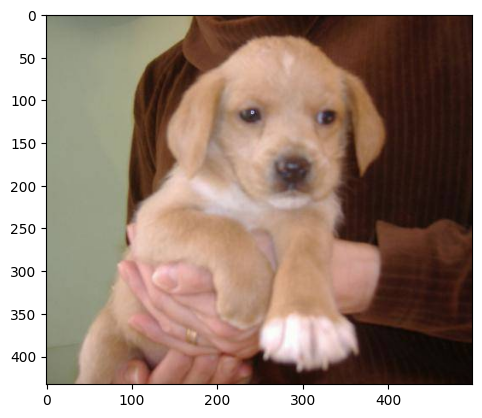

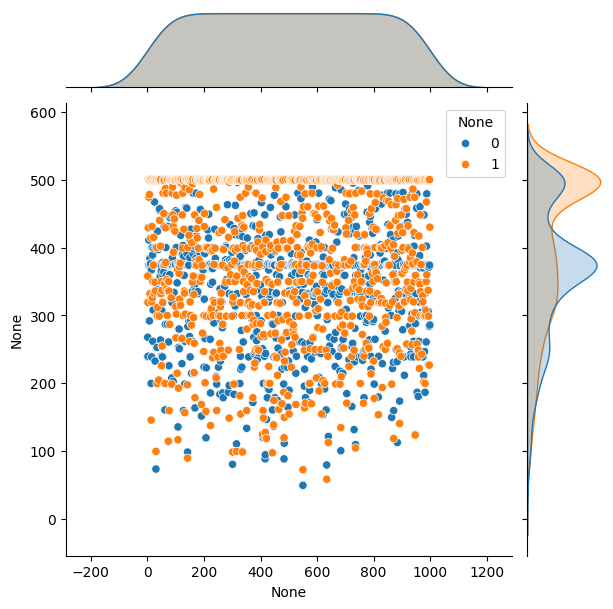

In [26]:
# Visualise the original data
dog_image = train_path + '/dog' + '/dog.103.jpg'
plt.imshow(imread(dog_image))
plt.show
print(imread(dog_image).shape)

dim1 = []
dim2 = []

for image_file in os.listdir(train_path+'/dog'):
    img = imread(train_path +'/dog/'+image_file)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

sns.jointplot((dim1,dim2))
print("Mean across height of all dog images in train set is:",np.mean(dim1))
print("Mean across width of all dog images in train set is:",np.mean(dim2))
# Q: Do all the images in the dataset have the same sizes? A: No

### Converting the image dataset into a workable format

We have the images in folders. We need to make it into a workable dataset:
  * Which has labels
  * All the images have the same size

For this, we will use the utility [**image_dataset_from_directory**](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory).

Calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

In [27]:
# YOUR CODE HERE
train_dataset = image_dataset_from_directory(train_path, labels = 'inferred', image_size=(180, 180))
val_dataset = image_dataset_from_directory(validation_path, labels = 'inferred', image_size=(180, 180))
test_dataset = image_dataset_from_directory(test_path, labels = 'inferred', image_size=(180, 180))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [28]:
print(f"train_dataset = {train_dataset}")

train_dataset = <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [29]:
# Verify batch size
for train_batch, label_batch in train_dataset:
    print(train_batch.shape)
    print(label_batch.shape)
    break
# Q: What is the batch size of each mini-batch? A: 32

(32, 180, 180, 3)
(32,)


In [30]:
# Define covnet model
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)  # Rescale input to lie between 0 and 1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # Q: Why sigmoid? A: Binary classification
model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
# compile the model
model.compile(loss="binary_crossentropy",   # Q: Why binary_crossentropy? A: Binary classification
                      optimizer="rmsprop",
                      metrics=["accuracy"])

In [32]:
# fit the model
model.fit(train_dataset, epochs = 10, callbacks = def_callbacks('convnet_from_scratch_keras_model'), validation_data = val_dataset)
## Using a previously defined callback function

Epoch 1/10
63/63 [==============================] - 203s 3s/step - loss: 0.6960 - accuracy: 0.5045 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 206s 3s/step - loss: 0.6899 - accuracy: 0.5605 - val_loss: 0.6640 - val_accuracy: 0.6590
Epoch 3/10
63/63 [==============================] - 187s 3s/step - loss: 0.6554 - accuracy: 0.6245 - val_loss: 0.6660 - val_accuracy: 0.5770
Epoch 4/10
63/63 [==============================] - 208s 3s/step - loss: 0.6135 - accuracy: 0.6625 - val_loss: 0.6053 - val_accuracy: 0.6880
Epoch 5/10
63/63 [==============================] - 207s 3s/step - loss: 0.5833 - accuracy: 0.6875 - val_loss: 0.5791 - val_accuracy: 0.7000
Epoch 6/10
63/63 [==============================] - 185s 3s/step - loss: 0.5582 - accuracy: 0.7155 - val_loss: 0.5825 - val_accuracy: 0.6790
Epoch 7/10
63/63 [==============================] - 218s 3s/step - loss: 0.5275 - accuracy: 0.7485 - val_loss: 0.5795 - val_accuracy: 0.6970
Epoch 8/10
63

In [33]:
# Evaluate using `.evaluate`
test_model = keras.models.load_model("convnet_from_scratch_keras_model")
loss , acc = test_model.evaluate(test_dataset)


63/63 [==============================] - 49s 777ms/step - loss: 0.5816 - accuracy: 0.7175


Great! From just **2000** images, our network has learnt to classify images of cats and dogs with an accuracy of apx **70%**

## 3. Data Augmentation

The small dataset can cause a high variance estimation of model performance

Q: How to overcome this and get a more robust model?

Now, we want to avoid this problem altogether by artificially (and cleverly) producing new data from the already available data.

For this, we perform **data augmentation**.

Data augmentation is another regularization method. What other methods did we see in the last tutorial?

Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformations that yield a believable-looking image. Common transformations include:
  * Flipping the image
  * Rotating the image
  * Zooming in/out of the image

See some sample images below after augmentation:

![picture](https://drive.google.com/uc?export=view&id=1HRhsHEHtcVptNVMF1EbCGiZX5XuTdrs5)

In [34]:
# Performing the data augmentation as series of transformations
def get_data_augmented(flip = 'horizontal', rotation = 0.1, zoom = 0.2):
    data_augmented = keras.Sequential([
        keras.layers.RandomFlip(flip),
        keras.layers.RandomRotation(rotation),
        keras.layers.RandomZoom(zoom)
    ])
    return data_augmented
# Q: what does the above function return? A: A sequence of layers

data_augmentation = get_data_augmented()


In [35]:
inputs = keras.Input(shape=(180, 180, 3))
# Augmenting data - Transformations of images by random factors
# so the the network never sees the same data twice
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)     # Q: Dropout is a _______ method
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [36]:
PARTIAL_RUN = False
epochs = 80
if PARTIAL_RUN:
  epochs = 2
# Fit the model
model.fit(train_dataset, epochs = 10, callbacks = def_callbacks('convnet_from_scratch_with_augmentation_keras'), validation_data = val_dataset)

Epoch 1/10
63/63 [==============================] - 201s 3s/step - loss: 0.7050 - accuracy: 0.4940 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 215s 3s/step - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 201s 3s/step - loss: 0.6946 - accuracy: 0.5210 - val_loss: 0.6895 - val_accuracy: 0.5040
Epoch 4/10
63/63 [==============================] - 202s 3s/step - loss: 0.6853 - accuracy: 0.5725 - val_loss: 0.6620 - val_accuracy: 0.6200
Epoch 5/10
63/63 [==============================] - 195s 3s/step - loss: 0.6713 - accuracy: 0.6050 - val_loss: 0.6698 - val_accuracy: 0.5870
Epoch 6/10
63/63 [==============================] - 201s 3s/step - loss: 0.6578 - accuracy: 0.6135 - val_loss: 0.6346 - val_accuracy: 0.6480
Epoch 7/10
63/63 [==============================] - 202s 3s/step - loss: 0.6391 - accuracy: 0.6320 - val_loss: 0.6123 - val_accuracy: 0.6700
Epoch 8/10
63

In [37]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [38]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation_keras")

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 51s 803ms/step - loss: 0.5891 - accuracy: 0.6890
Test accuracy: 0.689


With data augmentation, we roughly get **82-85%** accuracy. This is a big improvement over the previous approach, where we got roughly 70% accuracy.

### Please answer the questions below to complete the experiment:




In [3]:
#@title  We are applying 2 convolution filters of size 3X3 on an image of a size 6X6 Pixel having 3 channels. What is the shape of the output after the convolution operation and what is the number of parameters including bias? Given, no padding and stride is one. {run: "auto", form-width: "500px", display-mode: "form" }
Answer = "(4X4X2); 56" #@param ["", "(4X4X2); 56", "(3X3X2); 20", "(3X3X2); 56", "(4X4X2); 20"]

In [4]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [5]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "it's fine" #@param {type:"string"}


In [6]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [7]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [8]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [14]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3785
Date of submission:  19 May 2024
Time of submission:  12:37:14
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
